# **Data Loading and Data Preprocessing**

In [492]:
import pandas as pd
data = pd.read_excel('Rotten_Tomatoes_Movies3.xls')

In [493]:
data.head(1)

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0


In [494]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie_title         16638 non-null  object        
 1   movie_info          16614 non-null  object        
 2   critics_consensus   8309 non-null   object        
 3   rating              16638 non-null  object        
 4   genre               16621 non-null  object        
 5   directors           16524 non-null  object        
 6   writers             15289 non-null  object        
 7   cast                16354 non-null  object        
 8   in_theaters_date    15823 non-null  datetime64[ns]
 9   on_streaming_date   16636 non-null  datetime64[ns]
 10  runtime_in_minutes  16483 non-null  float64       
 11  studio_name         16222 non-null  object        
 12  tomatometer_status  16638 non-null  object        
 13  tomatometer_rating  16638 non-null  int64     

In [495]:
#collect objects
object_columns = data.select_dtypes(include=['object']).columns
int_columns = data.select_dtypes(include=['int64','float64']).columns

In [496]:
print(object_columns)
print(int_columns)

Index(['movie_title', 'movie_info', 'critics_consensus', 'rating', 'genre',
       'directors', 'writers', 'cast', 'studio_name', 'tomatometer_status'],
      dtype='object')
Index(['runtime_in_minutes', 'tomatometer_rating', 'tomatometer_count',
       'audience_rating'],
      dtype='object')


In [497]:
data.isna().sum()

,0
movie_title,0
movie_info,24
critics_consensus,8329
rating,0
genre,17
directors,114
writers,1349
cast,284
in_theaters_date,815
on_streaming_date,2


# **EDA Visualaization**

In [498]:
import matplotlib.pyplot as plt
import seaborn as sns

rating
R         6136
NR        4862
PG-13     2885
PG        2062
G          652
NC17        37
PG-13)       3
R)           1
Name: count, dtype: int64


<Axes: xlabel='rating', ylabel='count'>

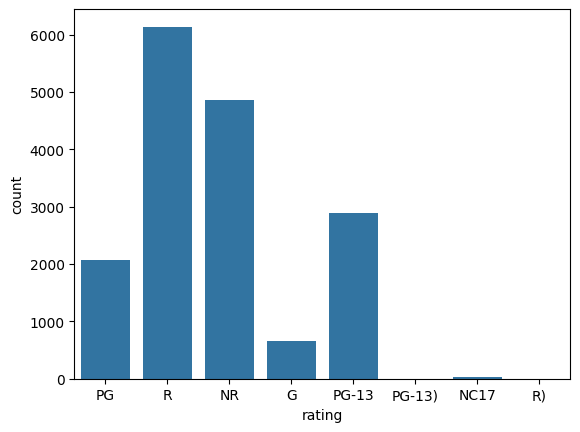

In [499]:
print(data.rating.value_counts())
sns.countplot(data ,x ='rating' )

In [500]:
#replace
data.rating.replace({'PG-13)': 'PG13' ,'PG-13':'PG13' ,'R)':'R' , 'PG':'G'}, inplace=True)
print(data.rating.value_counts())

rating
R       6137
NR      4862
PG13    2888
G       2714
NC17      37
Name: count, dtype: int64


<ipython-input-500-db915a17c2e9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.rating.replace({'PG-13)': 'PG13' ,'PG-13':'PG13' ,'R)':'R' , 'PG':'G'}, inplace=True)


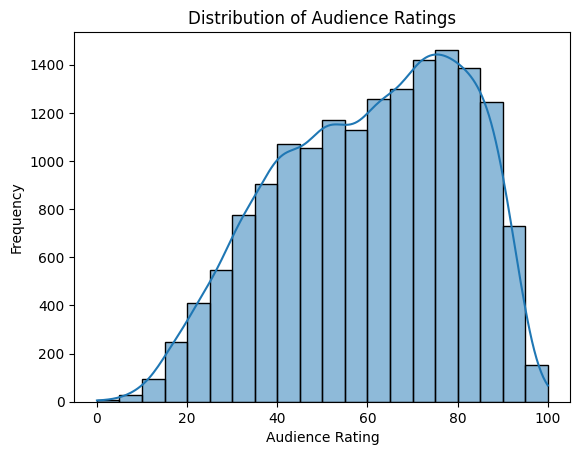

In [501]:
#EDA

# Distribution of audience ratings
sns.histplot(data['audience_rating'], bins=20, kde=True)
plt.title('Distribution of Audience Ratings')
plt.xlabel('Audience Rating')
plt.ylabel('Frequency')
plt.show()

tomatometer_status
Rotten             7233
Fresh              6448
Certified Fresh    2957
Name: count, dtype: int64


<Axes: xlabel='tomatometer_status', ylabel='count'>

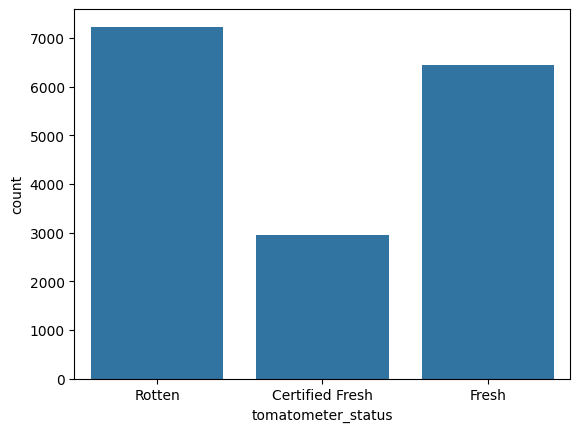

In [502]:
print(data.tomatometer_status.value_counts())
sns.countplot(data ,x ='tomatometer_status' )

<Axes: xlabel='runtime_in_minutes', ylabel='Count'>

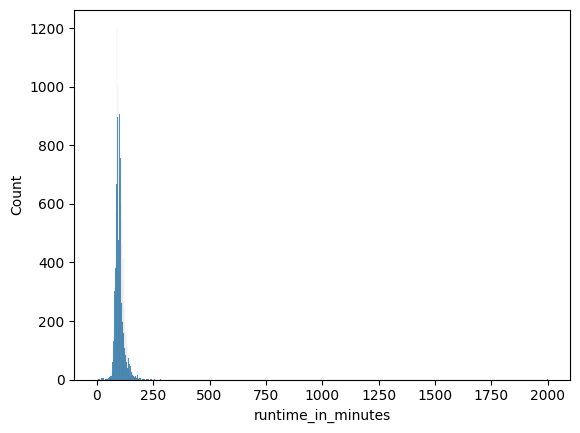

In [503]:
sns.histplot(data=data, x='runtime_in_minutes')

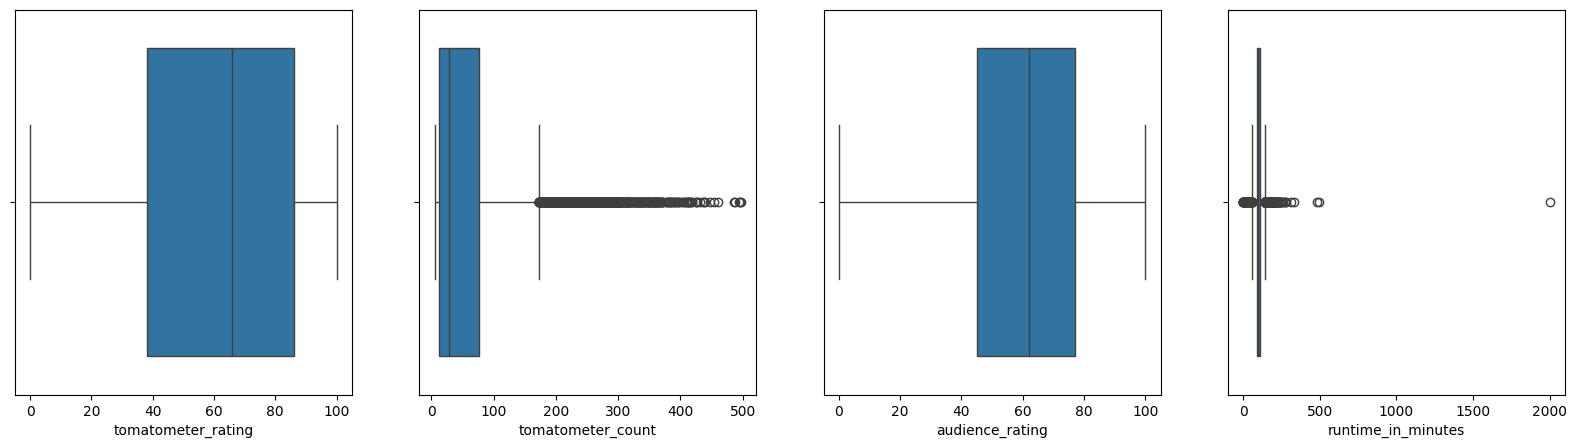

In [504]:
#Columns with high correlation
#Checking for OUTLIERS
box_col = ['tomatometer_rating', 'tomatometer_count', 'audience_rating','runtime_in_minutes']
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax = ax.flatten()
for index, value in enumerate(box_col):
    sns.boxplot(data=data, x=value, ax=ax[index])

In [505]:
hist_col = data.select_dtypes('number').columns
hist_col.shape

(4,)

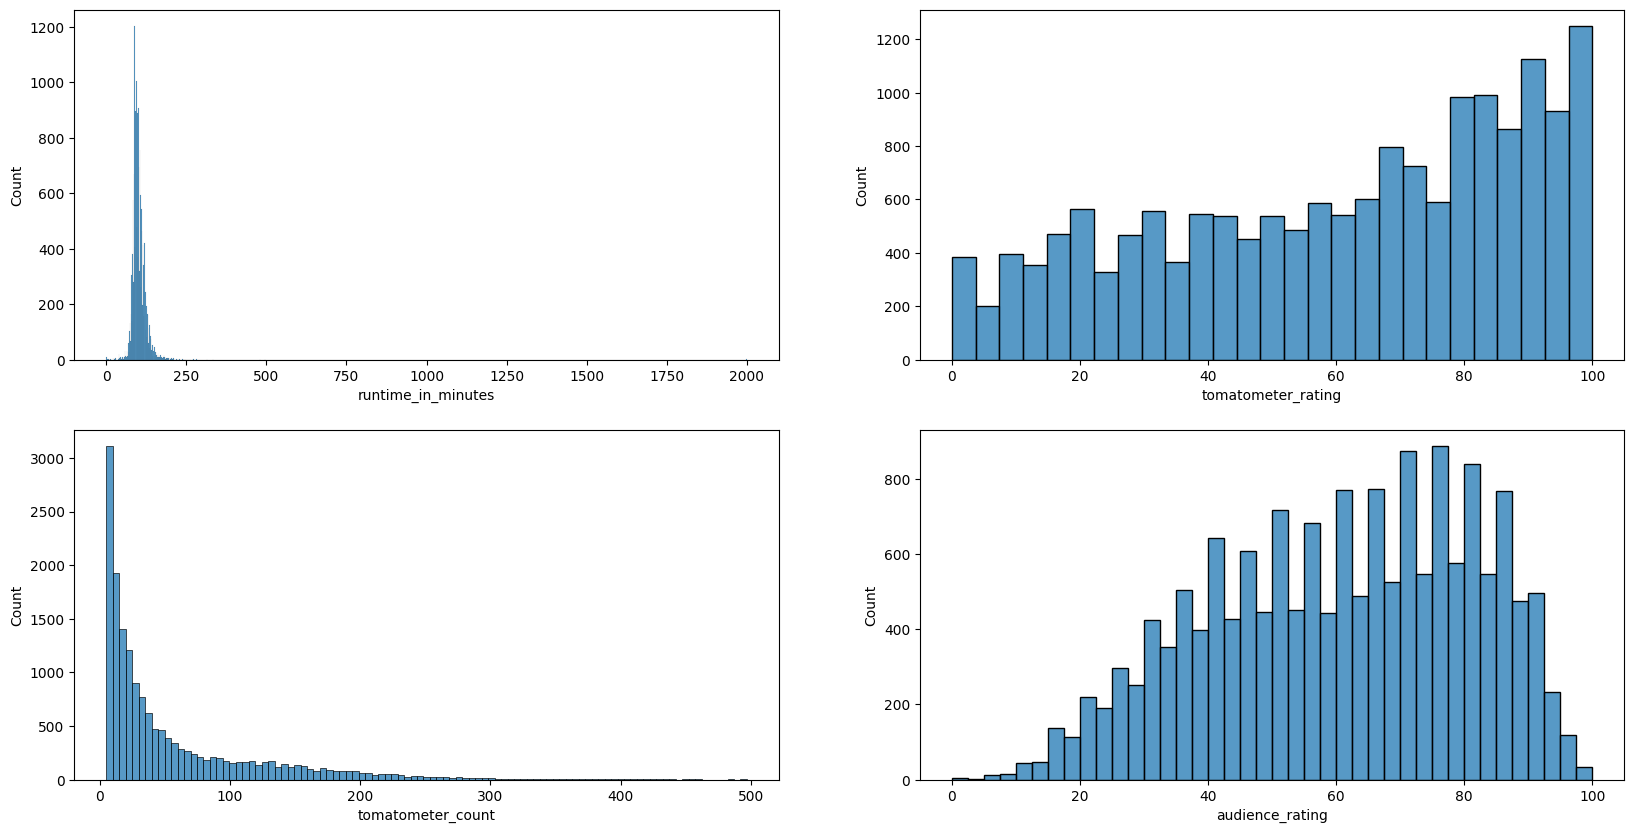

In [506]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
ax = ax.flatten()
for index, value in enumerate(hist_col):
    sns.histplot(data=data, x=value, ax=ax[index])

In [507]:
from scipy.stats import iqr
import numpy as np
mask1 = data['tomatometer_count'] < iqr(data['tomatometer_count']) * 1.5 + np.percentile(data['tomatometer_count'], 75)
mask2 = data['runtime_in_minutes'] < iqr(data['runtime_in_minutes']) * 1.5 + np.percentile(data['runtime_in_minutes'], 75)


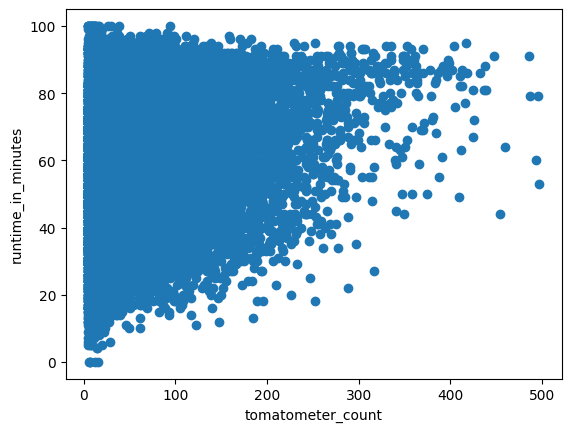

In [508]:
plt.scatter(data['tomatometer_count'], data['audience_rating'])
plt.xlabel('tomatometer_count')
plt.ylabel('runtime_in_minutes')
plt.show()

In [509]:
data.describe()

,in_theaters_date,on_streaming_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating
count,15823,16636,16483.000000,16638.000000,16638.000000,16386.000000
mean,1999-10-24 22:10:52.973519488,2008-08-13 13:35:49.266650624,102.391494,60.466522,56.607104,60.470829
min,1914-06-01 00:00:00,1935-06-06 00:00:00,1.000000,0.000000,5.000000,0.000000
25%,1993-03-29 00:00:00,2003-01-28 00:00:00,90.000000,38.000000,12.000000,45.000000
50%,2006-08-04 00:00:00,2008-04-08 00:00:00,99.000000,66.000000,28.000000,62.000000
75%,2013-06-28 00:00:00,2014-05-12 00:00:00,111.000000,86.000000,76.000000,77.000000
max,2019-12-07 00:00:00,2019-11-01 00:00:00,2000.000000,100.000000,497.000000,100.000000
std,NaN,NaN,25.028011,28.587230,66.383800,20.462368


In [510]:
#drop column
column =['critics_consensus' ,'movie_info','movie_title' ,'directors','genre','cast','in_theaters_date','on_streaming_date','writers','studio_name']
df_feature = data.drop(columns=column)

In [511]:
#drop null values

#data.dropna(inplace=True)

In [512]:
df_feature.isna().sum()

,0
rating,0
runtime_in_minutes,155
tomatometer_status,0
tomatometer_rating,0
tomatometer_count,0
audience_rating,252


In [513]:
#fill null values
df_feature.runtime_in_minutes.fillna(df_feature.runtime_in_minutes.mean(), inplace=True)
df_feature.audience_rating.fillna(df_feature.audience_rating.mean(), inplace=True)

<ipython-input-513-2d0eb3a28b3f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_feature.runtime_in_minutes.fillna(df_feature.runtime_in_minutes.mean(), inplace=True)
<ipython-input-513-2d0eb3a28b3f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[c

In [514]:
from sklearn.preprocessing import LabelEncoder
r_le = LabelEncoder()
df_feature['rating'] = r_le.fit_transform(df_feature['rating'])

t_le = LabelEncoder()
df_feature['tomatometer_status'] = t_le.fit_transform(df_feature['tomatometer_status'])

<Axes: >

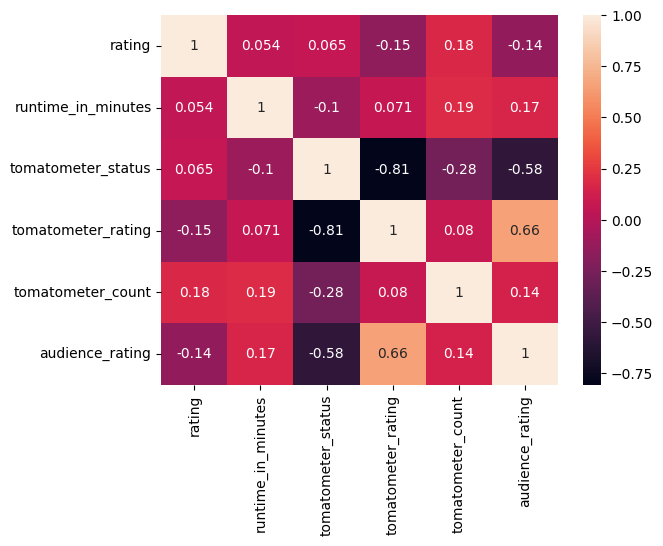

In [515]:
sns.heatmap(df_feature.corr(), annot=True)

In [516]:
df_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rating              16638 non-null  int64  
 1   runtime_in_minutes  16638 non-null  float64
 2   tomatometer_status  16638 non-null  int64  
 3   tomatometer_rating  16638 non-null  int64  
 4   tomatometer_count   16638 non-null  int64  
 5   audience_rating     16638 non-null  float64
dtypes: float64(2), int64(4)
memory usage: 780.0 KB


In [517]:
df_feature.describe()

,rating,runtime_in_minutes,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
count,16638.000000,16638.000000,16638.000000,16638.000000,16638.000000,16638.000000
mean,2.582822,102.391494,1.257002,60.466522,56.607104,60.470829
std,1.401477,24.911150,0.739213,28.587230,66.383800,20.306805
min,0.000000,1.000000,0.000000,0.000000,5.000000,0.000000
25%,2.000000,90.000000,1.000000,38.000000,12.000000,45.000000
50%,3.000000,99.000000,1.000000,66.000000,28.000000,62.000000
75%,4.000000,111.000000,2.000000,86.000000,76.000000,77.000000
max,4.000000,2000.000000,2.000000,100.000000,497.000000,100.000000


In [518]:
piple_data = df_feature.copy()

In [519]:
df_feature = df_feature.iloc[:,:-1]
y = df_feature.iloc[:,-1]

In [520]:
#standardDivition
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_feature = scaler.fit_transform(df_feature)
df_feature = pd.DataFrame(df_feature)
df_feature.describe()

,0,1,2,3,4
count,1.663800e+04,1.663800e+04,1.663800e+04,1.663800e+04,1.663800e+04
mean,1.315345e-16,3.640688e-17,9.320589e-17,-9.133750e-17,-1.921771e-17
std,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00
min,-1.842984e+00,-4.070247e+00,-1.700510e+00,-2.115222e+00,-7.774285e-01
25%,-4.158754e-01,-4.974426e-01,-3.476801e-01,-7.859173e-01,-6.719779e-01
50%,2.976788e-01,-1.361477e-01,-3.476801e-01,1.935705e-01,-4.309480e-01
75%,1.011233e+00,3.455788e-01,1.005150e+00,8.932046e-01,2.921417e-01
max,1.011233e+00,7.617735e+01,1.005150e+00,1.382948e+00,6.634241e+00


# **Train and Test Split and Create a RandomForestRegressor**

In [521]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_feature, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (13310, 5)
X_test shape: (3328, 5)
y_train shape: (13310,)
y_test shape: (3328,)


In [522]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae =mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.011192908653845991
Mean Squared Error: 0.015091856971153785
R-squared: 0.999996765562673


Text(0.5, 1.0, 'Actual vs. Predicted Values')

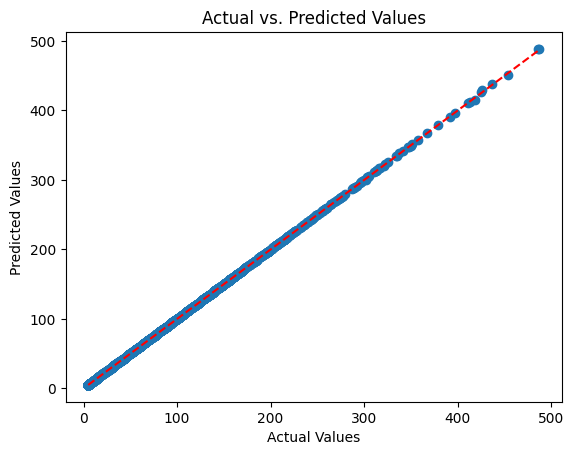

In [523]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")


# **Use Pipeline**

Note :
 StandardScaler was applied, but it did not work as expected and did not reduce the mean.

In [524]:
X = piple_data.iloc[:,:-1]
target = piple_data['audience_rating']

In [525]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer

features = ['tomatometer_rating', 'tomatometer_count', 'runtime_in_minutes','rating', 'tomatometer_status']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, features)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor())])

In [526]:
from os import pipe
randomforest = RandomForestRegressor(random_state=42)
pipeline = Pipeline(steps=[
                           ('preprocessor', preprocessor),
                           ('regressor', randomforest)])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=42)

model =pipeline.fit(X_train, y_train)

In [527]:
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['tomatometer_rating',
                                                   'tomatometer_count',
                                                   'runtime_in_minutes',
                                                   'rating',
                                                   'tomatometer_status'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [528]:
#predict model
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score ,mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae =mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 12.472222168726432
Mean Squared Error: 252.72108047569907
R-squared: 0.3804763434627868


Text(0, 0.5, 'Predicted Values')

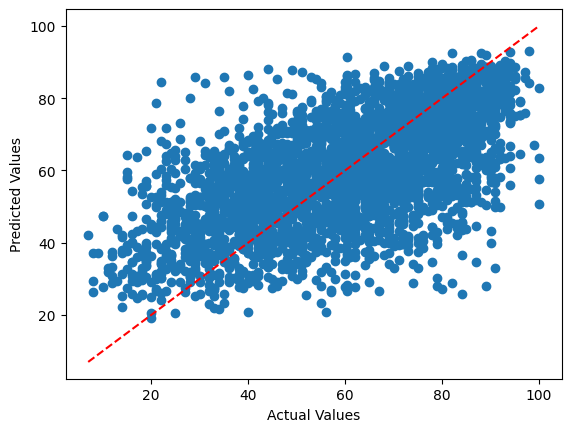

In [529]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

In [530]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
X = piple_data.iloc[:,:-1]
target = piple_data['audience_rating']

# Define the preprocessor (numeric transformation removed as it's unnecessary here)
preprocessor = ColumnTransformer(transformers=[
    ('num', 'passthrough', features)
])

# Define the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=0))
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=42)

# Fit the model
model = pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 12.438369461522768
Mean Squared Error: 250.75102648450394
R-squared: 0.3853057587608838
